# Netflix Stock Price

# Importing the files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score, accuracy_score

# Data Loading

In [2]:
netflix = pd.read_csv("NFLX.csv")
netflix.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


<Axes: >

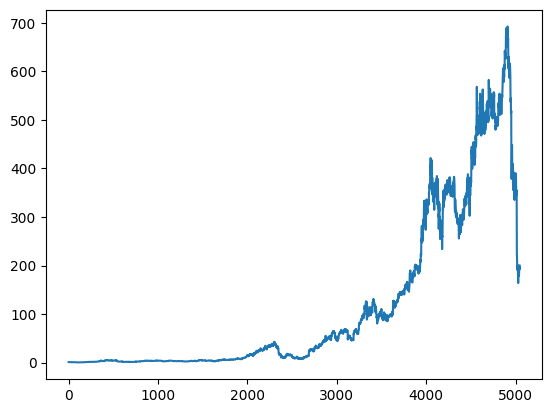

In [3]:
netflix['Open'].plot()

In [4]:
#Copy of the actual data
netflix_copy = netflix.copy()

# Observing the Trends

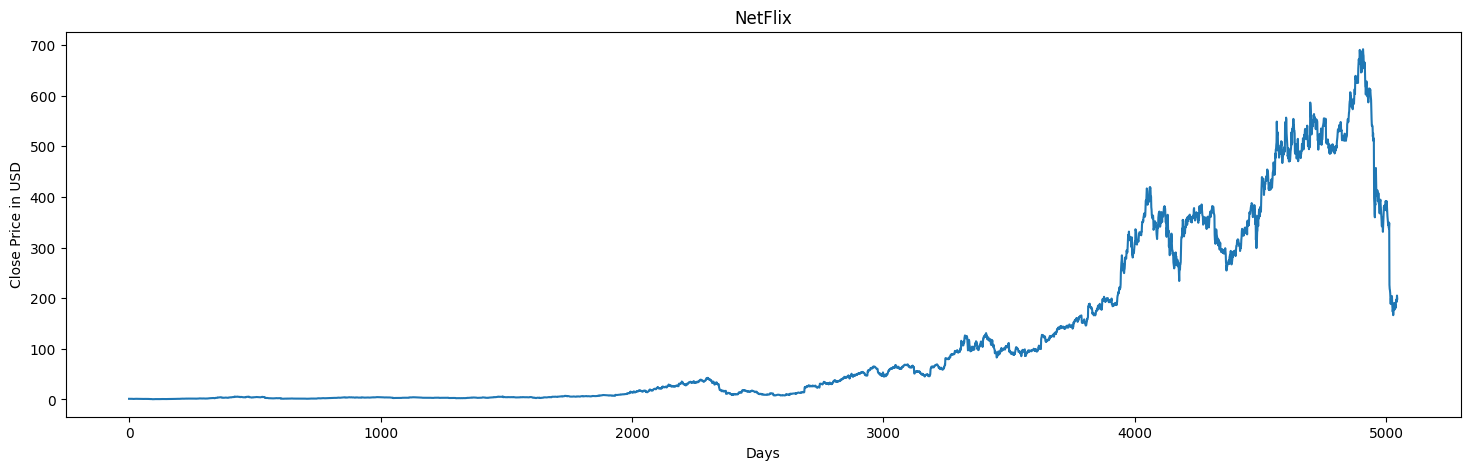

In [5]:
plt.figure(figsize=(18,5)) 
plt.title("NetFlix")
plt.xlabel('Days')
plt.ylabel('Close Price in USD')
plt.plot(netflix['Close'])
plt.show()

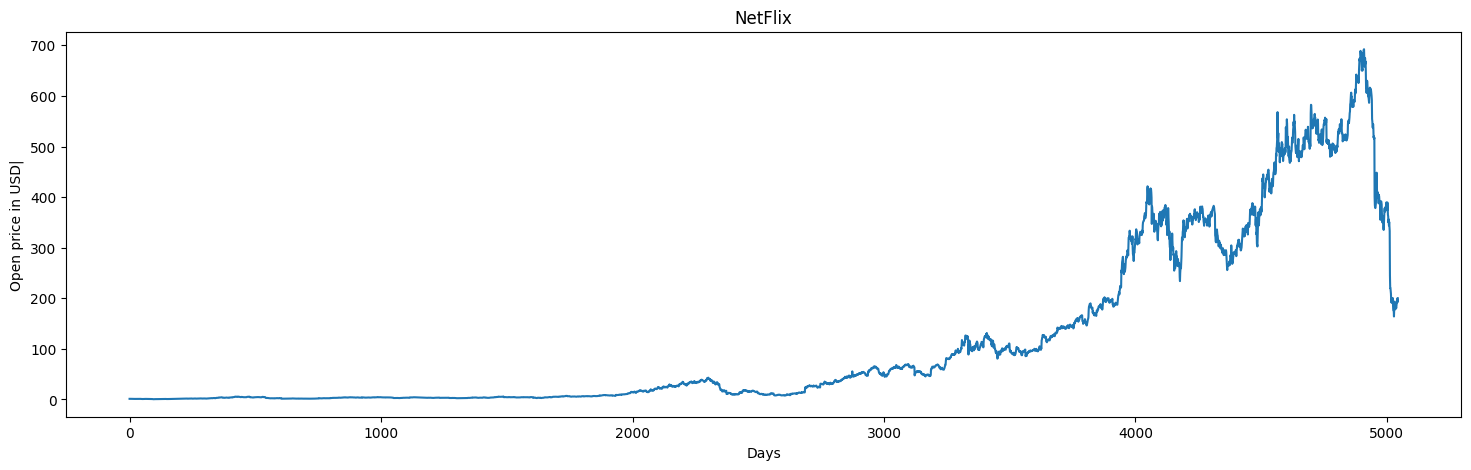

In [6]:
plt.figure(figsize=(18,5)) 
plt.title("NetFlix")
plt.xlabel('Days')
plt.ylabel('Open price in USD|')
plt.plot(netflix['Open'])
plt.show()

# Data Preparation

In [7]:
netflix.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [8]:
netflix.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5039,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
5040,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
5041,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200
5042,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100
5043,2022-06-03,200.139999,202.949997,198.050003,198.979996,198.979996,7181700


In [9]:
netflix.shape

(5044, 7)

In [10]:
#Checking for null values
netflix.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
#Checking for duplicate values
netflix.duplicated().sum()

0

In [12]:
#Structure of the dataset
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


In [13]:
# 5 number Statistics of the dataset 
netflix.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,5044.0,1.164680e+02,1.687409e+02,0.377857,3.955357e+00,2.581929e+01,1.557625e+02,6.923500e+02
High,5044.0,1.182374e+02,1.711409e+02,0.410714,4.031072e+00,2.634214e+01,1.576550e+02,7.009900e+02
Low,5044.0,1.145787e+02,1.661198e+02,0.346429,3.885357e+00,2.545500e+01,1.539450e+02,6.860900e+02
Close,5044.0,1.164563e+02,1.686682e+02,0.372857,3.958571e+00,2.580286e+01,1.558700e+02,6.916900e+02
Adj Close,5044.0,1.164563e+02,1.686682e+02,0.372857,3.958571e+00,2.580286e+01,1.558700e+02,6.916900e+02
Volume,5044.0,1.653068e+07,1.924487e+07,285600.000000,6.168225e+06,1.059135e+07,1.986552e+07,3.234140e+08


- Count- it shows how many rows are there
- mean - avg of each column
- std - scatter of data (differece in the values)
- min - minimum value in the column
- max - max value in the column
- 25%, 50%, 75% are the interquatile ranges - shows the range of the data i.e 25% of data is under x(some integer) value
  

In [14]:
train, test = train_test_split(netflix, test_size = 0.2)

In [15]:
#making a copy for the test data
test_pred = test.copy()

In [16]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
3204,2015-02-13,65.428574,66.629997,65.422859,66.585716,66.585716,12968900
836,2005-09-16,3.360000,3.465714,3.352857,3.457143,3.457143,6596800
2154,2010-12-10,28.197144,28.281429,27.500000,27.804285,27.804285,47511800
1607,2008-10-09,3.250000,3.442857,3.242857,3.277143,3.277143,12521600
1492,2008-04-28,4.740000,4.792857,4.657143,4.722857,4.722857,10395700
146,2002-12-19,0.770714,0.799286,0.758571,0.771429,0.771429,3781400
3630,2016-10-21,122.500000,127.849998,122.309998,127.500000,127.500000,18832400
4697,2021-01-20,565.419983,593.289978,556.859985,586.340027,586.340027,32637500
3266,2015-05-14,83.285713,83.924286,82.330002,83.835716,83.835716,8898400
1262,2007-05-30,3.092857,3.154286,3.081429,3.151429,3.151429,7326200


In [17]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
714,2005-03-24,1.301429,1.317143,1.272857,1.290000,1.290000,6776000
4682,2020-12-28,516.429993,523.659973,507.130005,519.119995,519.119995,2891900
860,2005-10-20,3.892857,3.957143,3.654286,3.661429,3.661429,23018100
861,2005-10-21,3.701429,3.794286,3.700000,3.735714,3.735714,12789000
2001,2010-05-05,13.930000,14.527143,13.744286,14.032857,14.032857,14749700
2095,2010-09-17,20.340000,20.350000,20.002857,20.065714,20.065714,23191000
4773,2021-05-10,502.000000,503.149994,486.109985,486.690002,486.690002,5131600
830,2005-09-08,3.237143,3.480000,3.215714,3.441429,3.441429,21770700
3299,2015-07-01,94.805717,95.238571,93.218575,93.635712,93.635712,14699300
2455,2012-02-22,16.415714,16.428572,15.505714,16.057142,16.057142,93191700


In [18]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [19]:
y_train = train['Close'].values
y_test = test['Close'].values

- X_train = for training  the model
- y_train = output of the data used while training the model
- x_test = for testing the model by giving the input
- y_test = output for the model testing

# Linear Regression

In [20]:
print(x_train.shape)
print(x_test.shape)

(4035, 4)
(1009, 4)


In [21]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [22]:
y_pred = model_lnr.predict(x_test)

In [23]:
result = model_lnr.predict([[436.46,441.11,428.91,4781300]])
print(result)

[434.2566918]


# Model Evaluation

In [24]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))
print("Accuracy score: ", accuracy_score(y_test,y_pred))

MSE 5.073
RMSE 2.252
MAE 0.961
MAPE 0.01
R2 Score :  1.0


ValueError: continuous is not supported

# Model Visualization

In [26]:
netflix_copy['Date']=pd.to_datetime(netflix_copy['Date'],format='%Y-%m-%d')

In [27]:
data = pd.DataFrame(netflix_copy[['Date','Close']])
data.set_index('Date', inplace=True) # making the Date column as index of the Dataframe 'data'
data = data.asfreq('D')
data

,Close
Date,
2002-05-23,1.196429
2002-05-24,1.210000
2002-05-25,NaN
2002-05-26,NaN
2002-05-27,NaN
...,...
2022-05-30,NaN
2022-05-31,197.440002
2022-06-01,192.910004


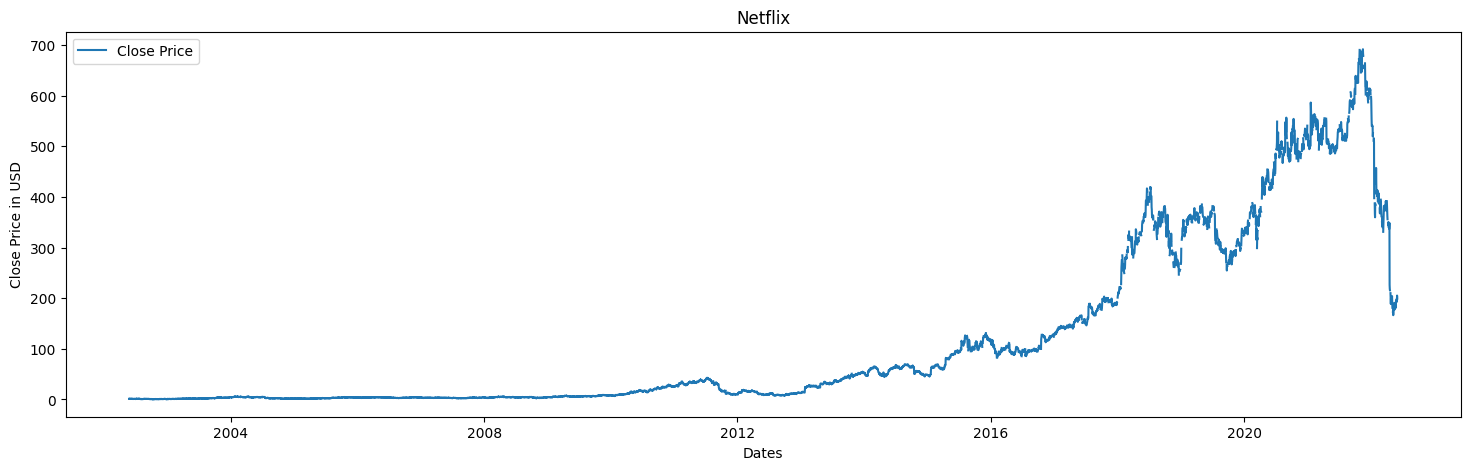

In [28]:
#Observing the Date and Close relations
plt.figure(figsize=(18, 5))
plt.title("Netflix")
plt.xlabel('Dates')
plt.ylabel('Close Price in USD')
plt.plot(data.index, data['Close'], label="Close Price", linestyle="-")
plt.legend()
plt.show()

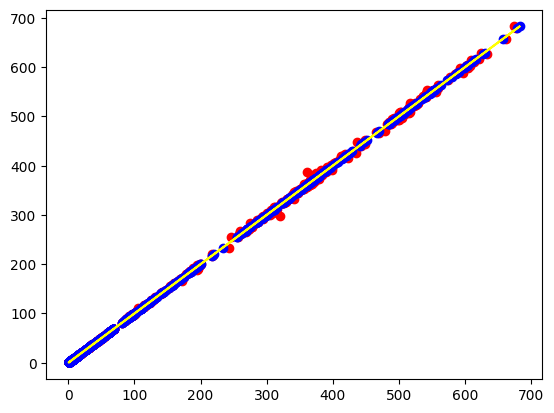

In [32]:
#Visualizing the predicted values against the actual values
plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='yellow')

In [35]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
714,2005-03-24,1.301429,1.317143,1.272857,1.290000,1.290000,6776000,1.311660
4682,2020-12-28,516.429993,523.659973,507.130005,519.119995,519.119995,2891900,514.962062
860,2005-10-20,3.892857,3.957143,3.654286,3.661429,3.661429,23018100,3.778825
861,2005-10-21,3.701429,3.794286,3.700000,3.735714,3.735714,12789000,3.800173
2001,2010-05-05,13.930000,14.527143,13.744286,14.032857,14.032857,14749700,14.300957
...,...,...,...,...,...,...,...,...
1416,2008-01-08,3.542857,3.552857,3.247143,3.328571,3.328571,14490000,3.334303
1611,2008-10-15,3.412857,3.454286,3.215714,3.215714,3.215714,5328400,3.307392
2660,2012-12-14,13.238571,13.527143,13.142857,13.328571,13.328571,27706700,13.429592
268,2003-06-17,1.560000,1.592857,1.508571,1.515000,1.515000,17542000,1.569622


# Actual close price v/s Predicted close price

In [36]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,1009.0,127.339615,173.864513,0.470714,4.237143,34.648571,191.399994,682.609985
Close_Prediction,1009.0,127.262087,173.708715,0.497283,4.267681,34.471692,194.136831,676.740253


<Axes: xlabel='Close', ylabel='Close_Prediction'>

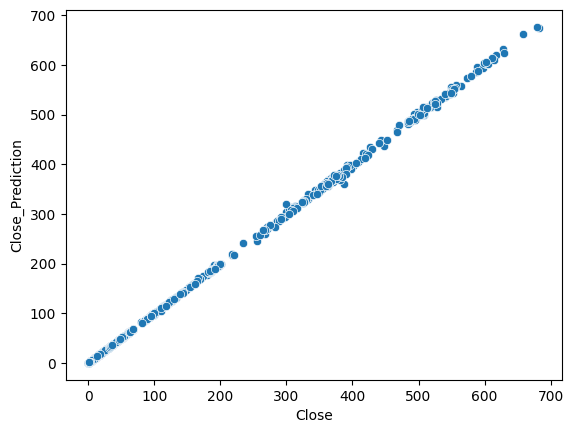

In [37]:
#Graph between the result and actual
sns.scatterplot(x = test_pred['Close'], y = test_pred['Close_Prediction'])

The graph shows a linear relation between open and close columns

In [ ]:
#pairplot is used to show relation between every column
sns.pairplot(netflix)

C:\Users\alok paul\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alok paul\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alok paul\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alok paul\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:111

In [60]:
#importing library to evaluate the results of regression problems
from sklearn.metrics import r2_score, mean_squared_error

In [61]:
#now comparing the available output (y_test) and the predicted output by model (y_pred)
r2_score(y_test,y_pred)

0.9998735246601012

So the r2_score is 1.0 which is the best possible score

In [62]:
mean_squared_error(y_test,y_pred)

3.7127690865554803

Lower the MSE, better the model so here MSE=1.4124 which is too good

In [63]:
print(result)

[1.18462137]


# Exporting the model file

In [65]:
import pickle
pickle.dump(model_lnr,open('NetflixStockModel.pkl','wb'))